In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
race = pd.read_csv('seikika_2019.csv', index_col=0)
race.drop(race.columns[np.isnan(race).any()], axis=1)
race.corr()

,距離,馬場,着順,馬番,斤量,単勝,人気,増減,前着順,前距離,前馬番,前人気,複勝,入賞,順位,単勝オッズ,複勝オッズ
距離,1.000000,-0.022608,-0.100684,-0.102244,0.151366,-0.027293,-0.100847,-0.008206,-0.089489,0.800523,-0.081478,-0.085764,-0.001018,-0.039567,-0.100684,-0.027293,-0.001018
馬場,-0.022608,1.000000,-0.004513,-0.002759,-0.043017,-0.026850,-0.004899,-0.000410,0.000141,-0.021281,0.001225,0.002038,0.005891,-0.000671,-0.004513,-0.026850,0.005891
着順,-0.100684,-0.004513,1.000000,0.138967,-0.065141,0.478619,0.614011,-0.013175,0.330950,-0.127096,0.046521,0.388001,-0.362092,0.676616,1.000000,0.478619,-0.362092
馬番,-0.102244,-0.002759,0.138967,1.000000,-0.035215,0.104181,0.144763,-0.006677,0.045352,-0.080056,0.179465,0.057928,-0.015473,0.058890,0.138967,0.104181,-0.015473
斤量,0.151366,-0.043017,-0.065141,-0.035215,1.000000,-0.084556,-0.077195,0.000985,-0.026383,0.171904,-0.024328,-0.098282,0.000112,-0.030393,-0.065141,-0.084556,0.000112
単勝,-0.027293,-0.026850,0.478619,0.104181,-0.084556,1.000000,0.729062,-0.033133,0.434202,-0.076641,0.041737,0.538370,-0.057651,0.279380,0.478619,1.000000,-0.057651
人気,-0.100847,-0.004899,0.614011,0.144763,-0.077195,0.729062,1.000000,-0.029493,0.503167,-0.130487,0.055611,0.642710,-0.033876,0.424081,0.614011,0.729062,-0.033876
増減,-0.008206,-0.000410,-0.013175,-0.006677,0.000985,-0.033133,-0.029493,1.000000,-0.008014,0.003223,0.003062,-0.010285,0.001849,-0.014715,-0.013175,-0.033133,0.001849
前着順,-0.089489,0.000141,0.330950,0.045352,-0.026383,0.434202,0.503167,-0.008014,1.000000,-0.084149,0.106463,0.509229,-0.020338,0.237121,0.330950,0.434202,-0.020338
前距離,0.800523,-0.021281,-0.127096,-0.080056,0.171904,-0.076641,-0.130487,0.003223,-0.084149,1.000000,-0.094879,-0.086791,0.012666,-0.061207,-0.127096,-0.076641,0.012666


In [4]:
import matplotlib.pyplot as plt
X = np.array([race["人気"], race["単勝"]]).T
Y = np.array(race["着順"])
plt.plot(X, Y)

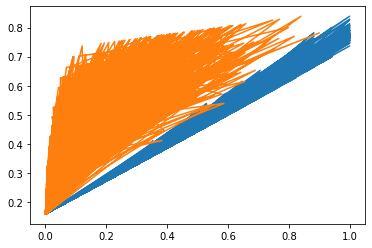

In [5]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y)
reg = LinearRegression().fit(X_train, Y_train)
plt.plot(X_test, reg.predict(X_test), label='linear regression')

In [115]:
X = np.array([race["馬番"], race["斤量"], race["単勝"], race["人気"], race["前着順"], race["前距離"], race["前馬番"], race["前人気"]]).T
Y = np.array(race["着順"])
Z = np.array(race["単勝オッズ"])
import sklearn.model_selection
X_train, X_test, Y_train, Y_test, Z_train, Z_test = sklearn.model_selection.train_test_split(X, Y, Z)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2).fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = LinearRegression().fit(X_train, Y_train)
print(f"X_train.shape : {X_train.shape}")
print(f"Score with Original features : {ridge.score(X_test, Y_test):.3f}")
print('-'*50)

ridge = LinearRegression().fit(X_train_poly, Y_train)
print(f"X_train_poly.shape : {X_train_poly.shape}")
print(f'Score with polynomial features  : {ridge.score(X_test_poly, Y_test):.3f}')

print('-'*50)

X_train.shape : (16634, 8)
Score with Original features : 0.389
--------------------------------------------------
X_train_poly.shape : (16634, 45)
Score with polynomial features  : 0.392
--------------------------------------------------


In [116]:
sum = 0
buy =0
for i, data in enumerate(X_test_poly):
    if ridge.predict(X_test_poly[i:i+1]) < 0.22:
        if Y_test[i] == 0:
            sum += Z_test[i]
        buy += 1

print(sum/buy)

0.8063278008298752


In [46]:
#race.isnull().sum()
race = race.dropna(how='any')
race

,距離,馬場,着順,馬番,斤量,単勝,人気,増減,前着順,前距離,前馬番,前人気,複勝,入賞,順位,単勝オッズ,複勝オッズ
0,0.307692,0.0,0.000000,0.000000,0.545455,0.000367,0.000000,0.210526,0.117647,0.289855,0.176471,0.058824,0.014531,0.0,1.0,1.4,110.0
1,0.307692,0.0,0.058824,0.117647,0.545455,0.002936,0.058824,0.315789,0.058824,0.289855,0.235294,0.058824,0.014531,0.0,2.0,3.5,110.0
2,0.307692,0.0,0.117647,0.176471,0.272727,0.055664,0.294118,0.500000,0.529412,0.173913,0.000000,0.058824,0.062087,0.0,3.0,46.6,470.0
3,0.307692,0.0,0.176471,0.470588,0.272727,0.068143,0.352941,0.315789,0.176471,0.289855,0.176471,0.352941,0.000000,1.0,4.0,56.8,0.0
4,0.307692,0.0,0.235294,0.235294,0.545455,0.170296,0.470588,0.421053,0.470588,0.289855,0.411765,0.352941,0.000000,1.0,5.0,140.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22241,0.615385,1.0,0.647059,0.588235,0.727273,0.145828,0.823529,0.526316,0.294118,0.347826,0.294118,0.529412,0.000000,1.0,12.0,120.3,0.0
22242,0.615385,1.0,0.705882,0.000000,0.545455,0.007830,0.176471,0.447368,0.470588,0.347826,0.058824,0.352941,0.000000,1.0,13.0,7.5,0.0
22243,0.615385,1.0,0.764706,0.117647,0.545455,0.120015,0.647059,0.605263,0.000000,0.310145,0.058824,0.000000,0.000000,1.0,14.0,99.2,0.0
22244,0.615385,1.0,0.823529,0.647059,0.363636,0.020064,0.411765,0.447368,0.529412,0.347826,0.176471,0.411765,0.000000,1.0,15.0,17.5,0.0
